In [1]:
from PIL import Image
import numpy as np
from numpy.linalg import cholesky
import matplotlib.pyplot as plt
import os

### 从index图中取出随机点，并将其替换掉原图中的随机点，将替换后的原图作为输入

In [13]:
sampleNo = 100
def CreateInputImage(newImg, pnewImg, indexImg, size, imageName, maskName, sparseName):
    mu = np.array([[size[0]/2, size[1]/2]])
    sigma0 = int(pow((size[0]/4),2))
    sigma1 = int(pow((size[1]/4),2))
    Sigma = np.array([[sigma0, 0], [0, sigma1]])
    
    R = cholesky(Sigma)
    pointList = np.dot(np.random.randn(sampleNo, 2), R) + mu
    sparseImg = Image.new("RGB", size)
    pSparseImg = sparseImg.load()

    newMaskImg = Image.new("RGB", size)
    pnewMaskImg = newMaskImg.load()
    for i in range(len(pointList)):
            x = int(pointList[i][0])
            y = int(pointList[i][1])
            if x > 223:
                x = 223
            if x < 0:
                x = 0
            if y > 223:
                y = 223
            if y < 0:
                y = 0
            pnewMaskImg[x, y] = (255, 255, 255, 255)
            pSparseImg[x, y] = indexImg[x, y]
            pnewImg[x, y] = indexImg[x,y]
            
    newImg.save(imageName)
    newMaskImg.save(maskName)
    sparseImg.save(sparseName)

In [15]:
ori_filename_list = []
ori_file_path = "F:/Project_Yang/Database/database_new/training_image"
#ori_file_path = "F:/Project_Yang/Database/training_image1000"
index_filename_list = []
index_file_path = "F:/Project_Yang/Database/database_new/index_image"
#index_file_path = "F:/Project_Yang/Database/index_image1000"

for item in os.listdir(ori_file_path):
    path = ori_file_path + '/' + item
    if os.path.isdir(path):     # 如果是文件夹
        ori_filename_list.extend(get_all_files(path))
    elif os.path.isfile(path):  # 如果是文件
        ori_filename_list.append(path)

for item in os.listdir(index_file_path):
    path = index_file_path + '/' + item
    if os.path.isdir(path):     # 如果是文件夹
        index_filename_list.extend(get_all_files(path))
    elif os.path.isfile(path):  # 如果是文件
        index_filename_list.append(path)

for i in range(len(ori_filename_list)):
#for i in range(10):
    oriImg = Image.open(ori_filename_list[i])
    orimg = oriImg.load()
    
    inImg = Image.open(index_filename_list[i])
    indexImg = inImg.load()
    size = inImg.size
    
    newImg = Image.new("RGB", size)
    newImg = oriImg
    pnewImg = newImg.load()
    
    #plt.subplot(231), plt.imshow(oriImg)
    #plt.subplot(232), plt.imshow(newImg)
    #plt.subplot(233), plt.imshow(inImg)
    #plt.show()
    
   
    if i % 10000 == 0:
        print(i)
    CreateInputImage(newImg, pnewImg, indexImg, size, 'F:/Project_Yang/Database/database_new/sparseReplace_image/' + str(i) + '_input.bmp', 
                     'F:/Project_Yang/Database/database_new/mask_image/' + str(i) + '_mask.bmp',
                     'F:/Project_Yang/Database/database_new/sparse_image/' + str(i) + '_sparse.bmp')

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000


#### 再从新生成的image中读取图片，看看顺序是否符合规律

#### 测试后没有问题，图片的读取就是按照内存地址进行读取的，只要图片处理和训练阶段都用os.kistdir，就没有问题

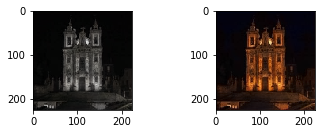

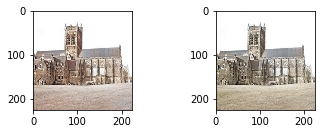

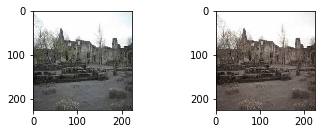

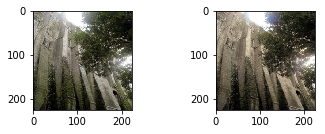

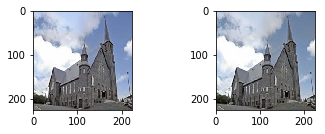

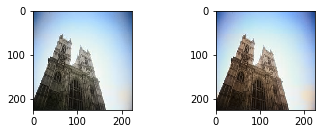

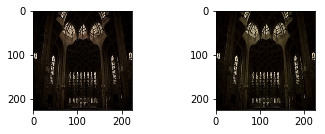

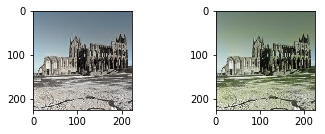

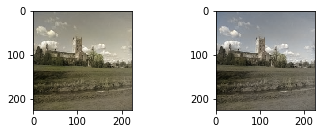

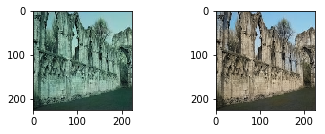

In [7]:
ori_filename_list = []
ori_file_path = "F:/Project_Yang/Database/training_image1000"
index_filename_list = []
index_file_path = "F:/Project_Yang/Database/index_image1000"

for item in os.listdir(ori_file_path):
    path = ori_file_path + '/' + item
    if os.path.isdir(path):     # 如果是文件夹
        ori_filename_list.extend(get_all_files(path))
    elif os.path.isfile(path):  # 如果是文件
        ori_filename_list.append(path)

for item in os.listdir(index_file_path):
    path = index_file_path + '/' + item
    if os.path.isdir(path):     # 如果是文件夹
        index_filename_list.extend(get_all_files(path))
    elif os.path.isfile(path):  # 如果是文件
        index_filename_list.append(path)

for i in range(10):
    oriImg = Image.open(ori_filename_list[i])
    orimg = oriImg.load()
    
    inImg = Image.open(index_filename_list[i])
    indexImg = inImg.load()
    
    plt.subplot(221), plt.imshow(oriImg)
    plt.subplot(222), plt.imshow(inImg)
    plt.show()